In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from os import listdir
from pandas import read_csv
from matplotlib import pyplot
%matplotlib inline

 
def load_dataset(prefix=''):
    subjects = list()
    directory =  '/home/rakesh/Downloads/Activity Recognition from Single Chest-Mounted Accelerometer/Activity Recognition from Single Chest-Mounted Accelerometer/'
    for name in listdir(directory):
        filename = directory + '/' + name
        if not filename.endswith('.csv'):
            continue
        df = read_csv(filename, header=None)
        values = df.values[:, 1:]
        subjects.append(values)
    return subjects

def plot_subject(subject):
	pyplot.figure()
	# create a plot for each column
	for col in range(subject.shape[1]):
		pyplot.subplot(subject.shape[1], 1, col+1)
		pyplot.plot(subject[:,col])
	pyplot.show()
# returns a list of dict, where each dict has one sequence per activity
def group_by_activity(subjects, activities):
	grouped = [{a:s[s[:,-1]==a] for a in activities} for s in subjects]
	return grouped

# calculate total duration in sec for each activity per subject and plot
def plot_durations(grouped, activities):
	# calculate the lengths for each activity for each subject
	freq = 52
	durations = [[len(s[a])/freq for s in grouped] for a in activities]
	pyplot.boxplot(durations, labels=activities)
	pyplot.show()

def plot_subjects(subjects):
	pyplot.figure()
	# create a plot for each subject
	for i in range(len(subjects)):
		pyplot.subplot(len(subjects), 1, i+1)
		# plot each of x, y and z
		for j in range(subjects[i].shape[1]-1):
			pyplot.plot(subjects[i][:,j])
	pyplot.show()    

    
def plot_subjects1(subjects):
	pyplot.figure()
	# create a plot for each subject
	xaxis = None
	for i in range(len(subjects)):
		ax = pyplot.subplot(len(subjects), 1, i+1, sharex=xaxis)
		if i == 0:
			xaxis = ax
		# plot a histogram of x data
		for j in range(subjects[i].shape[1]-1):
			pyplot.hist(subjects[i][:,j], bins=100)
	pyplot.show()    

/home/rakesh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2802: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Loaded 15 subjects


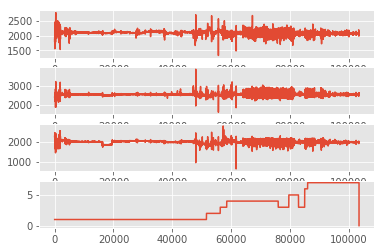

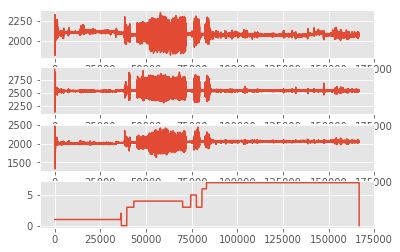

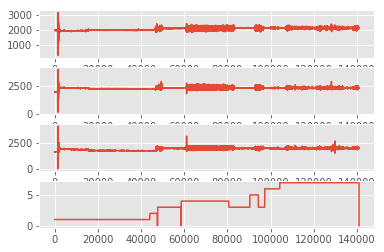

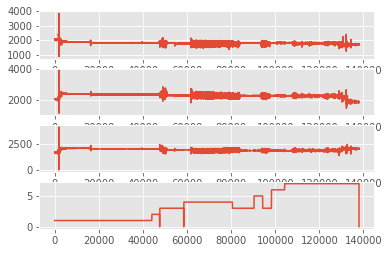

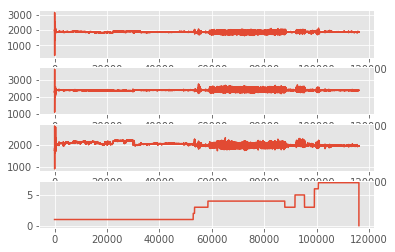

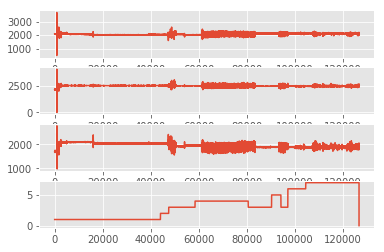

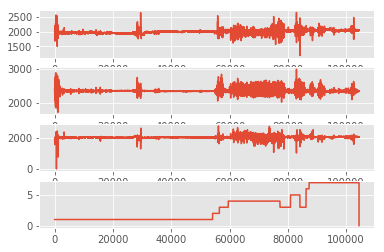

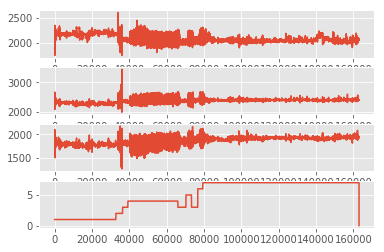

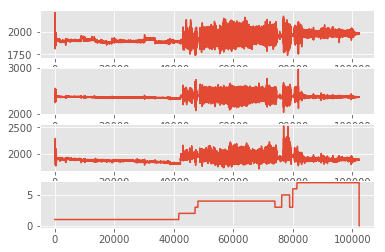

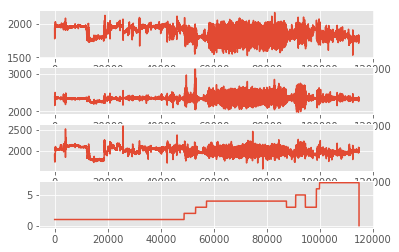

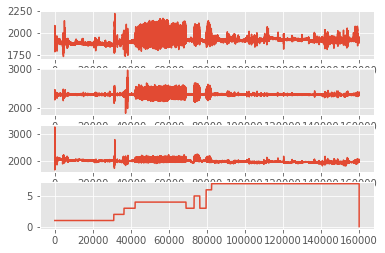

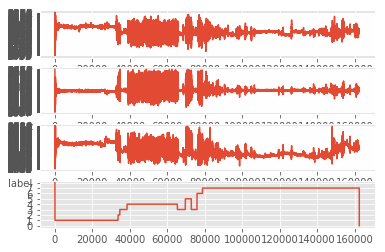

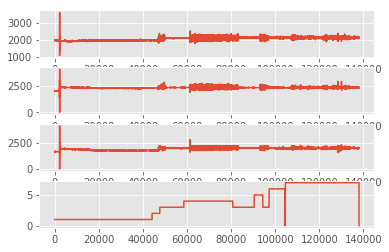

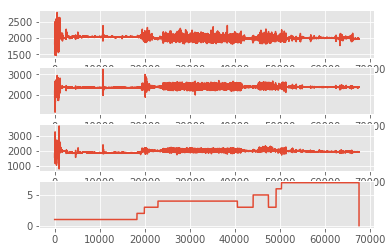

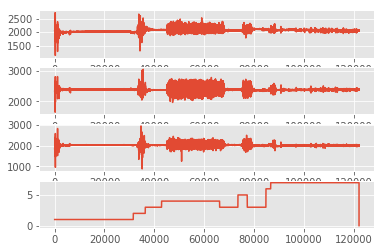

In [17]:
subjects = load_dataset()
print('Loaded %d subjects' % len(subjects))
for i in range(0,15):
    plot_subject(subjects[i])
    print()
    print()

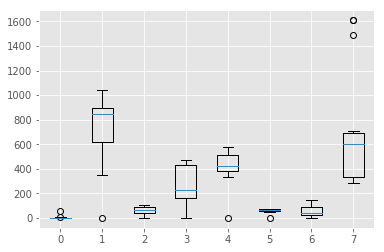

In [8]:
# group traces by activity for each subject
activities = [i for i in range(0,8)]
grouped = group_by_activity(subjects, activities)
# plot durations
plot_durations(grouped, activities)

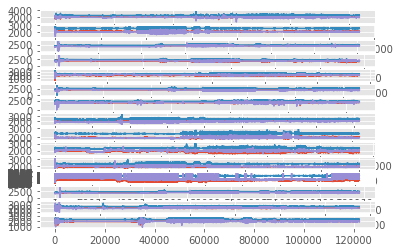

In [20]:
plot_subjects(subjects)

In [23]:
input_height = 1
input_width = 90
num_labels = 6
num_channels = 3

batch_size = 10
kernel_size = 60
depth = 60
num_hidden = 1000

learning_rate = 0.0001
training_epochs = 5

total_batchs = train_x.shape[0] // batch_size

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.0, shape = shape)
    return tf.Variable(initial)
	
def depthwise_conv2d(x, W):
    return tf.nn.depthwise_conv2d(x,W, [1, 1, 1, 1], padding='VALID')
	
def apply_depthwise_conv(x,kernel_size,num_channels,depth):
    weights = weight_variable([1, kernel_size, num_channels, depth])
    biases = bias_variable([depth * num_channels])
    return tf.nn.relu(tf.add(depthwise_conv2d(x, weights),biases))
    
def apply_max_pool(x,kernel_size,stride_size):
    return tf.nn.max_pool(x, ksize=[1, 1, kernel_size, 1], 
                          strides=[1, 1, stride_size, 1], padding='VALID')

X = tf.placeholder(tf.float32, shape=[None,input_height,input_width,num_channels])
Y = tf.placeholder(tf.float32, shape=[None,num_labels])

c = apply_depthwise_conv(X,kernel_size,num_channels,depth)
p = apply_max_pool(c,20,2)
c = apply_depthwise_conv(p,6,depth*num_channels,depth//10)

shape = c.get_shape().as_list()
c_flat = tf.reshape(c, [-1, shape[1] * shape[2] * shape[3]])

f_weights_l1 = weight_variable([shape[1] * shape[2] * depth * num_channels * (depth//10), num_hidden])
f_biases_l1 = bias_variable([num_hidden])
f = tf.nn.tanh(tf.add(tf.matmul(c_flat, f_weights_l1),f_biases_l1))

out_weights = weight_variable([num_hidden, num_labels])
out_biases = bias_variable([num_labels])
y_ = tf.nn.softmax(tf.matmul(f, out_weights) + out_biases)

loss = -tf.reduce_sum(Y * tf.log(y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

NameError: name 'train_x' is not defined